# News scraping and Text Analytics (Sentiment Analysis)

News headlines scraping from Yahoo.com.hk.

In [1]:
# Import necessary libraries
import re
import requests
from bs4 import BeautifulSoup as bfs4
import pandas as pd

In [72]:
# Connect to Yahoo HK news to collect news headers.
yhhknewsurl = requests.get('https://hk.news.yahoo.com').text
soup = bfs4(yhhknewsurl, 'html.parser')
headlines = soup.find_all('h3')

news_headline = []

for headline in headlines:
    headline = str(headline)
    header = re.findall('->((.*))<!',headline)
    header.sort(reverse=True)
    news_headline.append(header[0][1:])

# Print news headers line by line.
# for headline in headline_titles:
#    print(headline)

# Convert collected news headers to Pandas dataframes.
news_df = pd.DataFrame(news_headline, columns=['News_Headline'])

In [73]:
news_df.head(8)

,News_Headline
0,回收消費券！市民套現或涉法律責任｜林日曦離毛記 稱無絕症非移民｜KOL家明狙擊193遭群攻「...
1,要求《造星4》參加者素顏面試 花姐呻質素好差 唔睇技巧睇性格
2,律師分析：最重判死刑 吳亦凡傳涉9宗罪 淚崩求放生
3,昨增3女輸入個案柬美抵港 均無病徵
4,全城狂熱消費 百物悄悄騰貴
5,【熱門】比較冷氣維修、安裝及清洗服務！搜尋安裝冷氣
6,林日曦辭毛記葵涌執董 800萬悉售持股
7,首期消費券110億到手刺激零售


Text Analytics (Sentiment Analysis) of News headlines dataframe.

In [74]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [75]:
# Define the service key and endpoint of Azure Text Analytics
key = "PLEASE_ENTER_YOUR_OWNED_AZURE_TEXT_ANALYTICS_SERVICE_KEY"
endpoint = "https://PLEASE_ENTER_YOUR_OWNED_AZURE_TEXT_ANALYTICS_INSTANCE_NAME.cognitiveservices.azure.com/"

In [87]:
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

news_headline_sentiment = []

for index, headers in news_df.iterrows():
    news_headline = str(headers['News_Headline'])
    print(news_headline)
    documents = [news_headline]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Header Sentiment: {}".format(sentiment))
    news_headline_sentiment.append([news_headline, sentiment])

# Convert collected news headers with sentiment to Pandas dataframes.
news_df_with_sentiment = pd.DataFrame(news_headline_sentiment, columns=['News_Headline','Sentiment'])

回收消費券！市民套現或涉法律責任｜林日曦離毛記 稱無絕症非移民｜KOL家明狙擊193遭群攻「辭職」｜8月2日．Yahoo早報
Header Sentiment: neutral
要求《造星4》參加者素顏面試  花姐呻質素好差 唔睇技巧睇性格
Header Sentiment: negative
律師分析：最重判死刑  吳亦凡傳涉9宗罪  淚崩求放生
Header Sentiment: neutral
昨增3女輸入個案柬美抵港 均無病徵
Header Sentiment: neutral
全城狂熱消費  百物悄悄騰貴
Header Sentiment: neutral
【熱門】比較冷氣維修、安裝及清洗服務！搜尋安裝冷氣
Header Sentiment: positive
林日曦辭毛記葵涌執董 800萬悉售持股
Header Sentiment: neutral
首期消費券110億到手刺激零售
Header Sentiment: positive
【人氣】✦進修✦怕犯職場英文常見錯誤畀人笑？立即搜尋英語課程
Header Sentiment: negative
領券首日  網上稱75折套現零風險  倘涉造假欺詐  需負法律責任
Header Sentiment: negative
港大獲研資局撥款  研新冠病毒學
Header Sentiment: neutral
【新聞點評】疫苗國際線失守 商界須長期抗戰
Header Sentiment: neutral
負壓系統頻頻出事  揭顯示器故障  北大嶼感染控制中心  警報又誤鳴
Header Sentiment: negative
【推介】花點心思，粉飾您的寫意空間！立即搜尋設計裝修
Header Sentiment: positive
每日30分鐘親子耍樂  有益兒童身心健康
Header Sentiment: positive
首航返港  公海遊防疫  宜緊不宜鬆
Header Sentiment: negative
領取消費券  拍卡搞掂  街坊興奮  「幾蚊都試用」
Header Sentiment: negative
【人氣】比較熱門進修課程！提升實力　迎接璀璨未來！立即搜尋課程進修
Header Sentiment: positive
涉派對房間犯禁 20人遭票控
Header Sentiment: neu

In [91]:
news_df_with_sentiment.head(8)

,News_Headline,Sentiment
0,回收消費券！市民套現或涉法律責任｜林日曦離毛記 稱無絕症非移民｜KOL家明狙擊193遭群攻「...,neutral
1,要求《造星4》參加者素顏面試 花姐呻質素好差 唔睇技巧睇性格,negative
2,律師分析：最重判死刑 吳亦凡傳涉9宗罪 淚崩求放生,neutral
3,昨增3女輸入個案柬美抵港 均無病徵,neutral
4,全城狂熱消費 百物悄悄騰貴,neutral
5,【熱門】比較冷氣維修、安裝及清洗服務！搜尋安裝冷氣,positive
6,林日曦辭毛記葵涌執董 800萬悉售持股,neutral
7,首期消費券110億到手刺激零售,positive


<AxesSubplot:ylabel='News_Headline'>

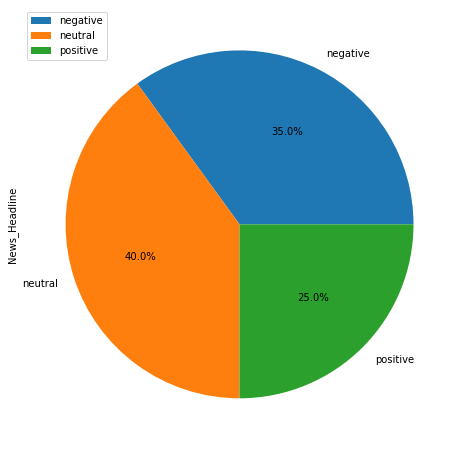

In [99]:
news_df_with_sentiment.groupby(['Sentiment']).count().plot(kind='pie', y='News_Headline', figsize=(8,8), autopct='%1.1f%%')